In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score
import numpy as np

## data exploration

In [2]:
df = pd.read_csv("./final_combined_dataset.csv")

In [3]:
df.head()

,T01,H01,T02,H02,T11,H11,T12,H12,T21,H21,T22,H22,Label,Fault Type,Beta
0,30.21,43.82,30.16,43.05,30.20,43.79,30.17,43.05,30.19,43.79,30.17,43.05,1,Stuck-at,NaN
1,30.20,43.79,30.17,43.05,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12,1,Stuck-at,NaN
2,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09,1,Stuck-at,NaN
3,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,1,Stuck-at,NaN
4,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,1,Stuck-at,NaN


In [4]:
df2 = df.drop(columns=['Fault Type', 'Beta'])

In [5]:
df2.head()

,T01,H01,T02,H02,T11,H11,T12,H12,T21,H21,T22,H22,Label
0,30.21,43.82,30.16,43.05,30.20,43.79,30.17,43.05,30.19,43.79,30.17,43.05,1
1,30.20,43.79,30.17,43.05,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12,1
2,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09,1
3,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,1
4,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,1


In [6]:
df2.shape

(276592, 13)

In [7]:
df2.describe()

,T01,H01,T02,H02,T11,H11,T12,H12,T21,H21,T22,H22,Label
count,276592.000000,276592.000000,276592.000000,276592.000000,276592.000000,276592.000000,276592.000000,276592.000000,276592.000000,276592.000000,276592.000000,276592.000000,276592.000000
mean,33.185460,69.061227,33.041942,70.859195,33.184632,69.067488,33.041144,70.865693,33.183809,69.073751,33.040347,70.872190,0.392549
std,29.976209,54.472097,27.925101,73.291797,29.976345,54.470882,27.925237,73.290681,29.976480,54.469663,27.925372,73.289565,0.919733
min,26.290000,43.790000,26.410000,42.850000,26.290000,43.790000,26.410000,42.850000,26.290000,43.790000,26.410000,42.850000,-1.000000
25%,27.210000,49.480000,27.360000,48.680000,27.210000,49.480000,27.357500,48.680000,27.210000,49.480000,27.350000,48.680000,-1.000000
50%,28.120000,65.070000,28.350000,61.760000,28.120000,65.070000,28.350000,61.760000,28.120000,65.070000,28.350000,61.760000,1.000000
75%,28.850000,69.280000,29.260000,68.560000,28.850000,69.280000,29.260000,68.567500,28.850000,69.280000,29.260000,68.590000,1.000000
max,300.700000,601.300000,281.300000,723.600000,300.700000,601.300000,281.300000,723.600000,300.700000,601.300000,281.300000,723.600000,1.000000


In [8]:
df2.isna().sum()

T01      0
H01      0
T02      0
H02      0
T11      0
H11      0
T12      0
H12      0
T21      0
H21      0
T22      0
H22      0
Label    0
dtype: int64

In [9]:
df2.shape

(276592, 13)

## preprocessing

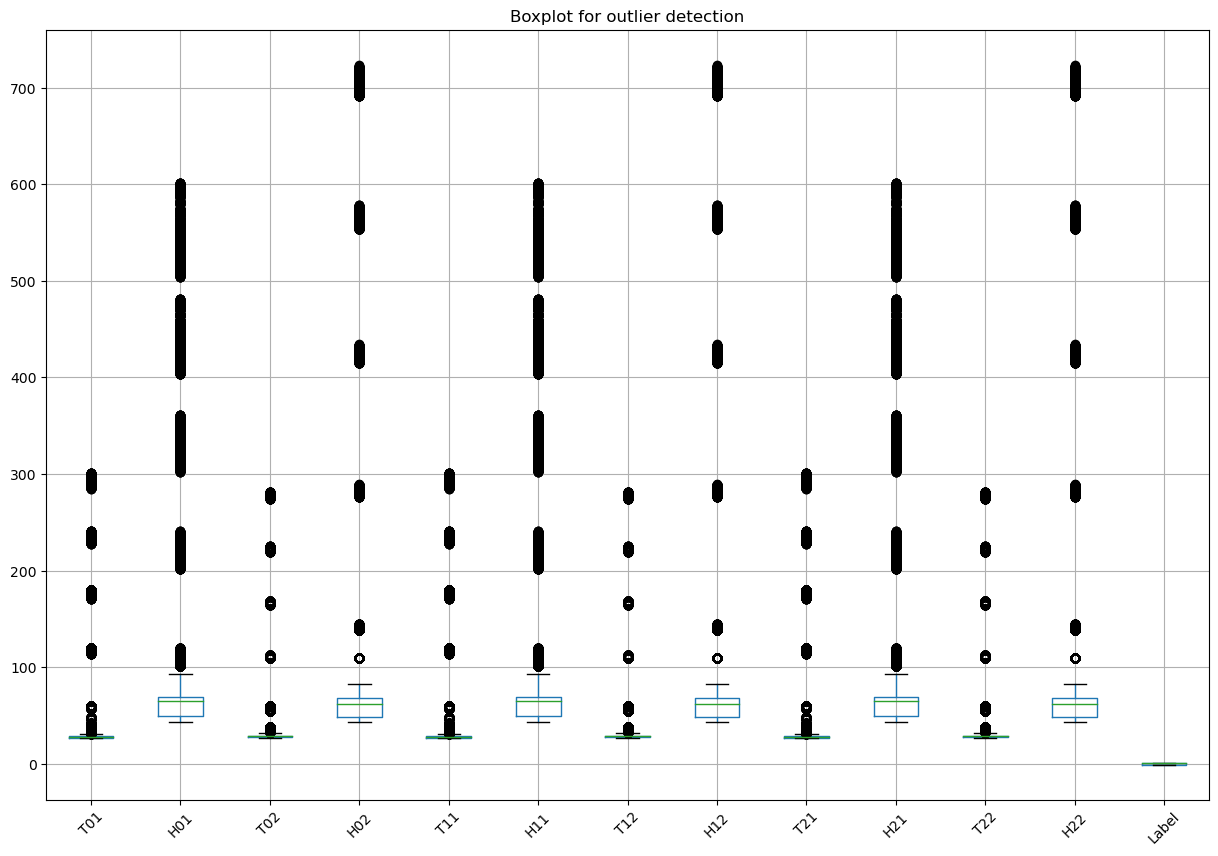

In [10]:
plt.figure(figsize=(15,10))
df2.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for outlier detection")
plt.show()

In [11]:
Q1 =  df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

In [12]:
outliers = ((df2 < (Q1 - 1.5 * IQR))| (df2 >(Q3 + 1.5*IQR)))

In [13]:
outliers.sum()

T01      20763
H01      10442
T02      17488
H02      10442
T11      20763
H11      10442
T12      17488
H12      10442
T21      20763
H21      10442
T22      17488
H22      10442
Label        0
dtype: int64

In [14]:
rows_with_outliers = outliers.any(axis=1)

In [15]:
df3 = df2[~rows_with_outliers]

In [16]:
df3.shape

(217001, 13)

In [17]:
df2.shape[0]-df3.shape[0]

59591

In [18]:
df3['Label'].value_counts()

Label
 1    191611
-1     25390
Name: count, dtype: int64

In [19]:
df3['Label'] = df3['Label'].map({1: 0, -1: 1})

In [20]:
df3.head()

,T01,H01,T02,H02,T11,H11,T12,H12,T21,H21,T22,H22,Label
0,30.21,43.82,30.16,43.05,30.20,43.79,30.17,43.05,30.19,43.79,30.17,43.05,0
1,30.20,43.79,30.17,43.05,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12,0
2,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09,0
3,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,0
4,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,0


In [21]:
df3.Label.value_counts()

Label
0    191611
1     25390
Name: count, dtype: int64

## Train the model

In [23]:
x = df3.drop(columns=['Label'])
y = df3.Label

In [24]:
x.shape

(217001, 12)

In [25]:
y.shape

(217001,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


## Adjust class Weights

In [27]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

class_weights_dict = dict(enumerate(class_weights))

print(class_weights_dict)


{0: 0.5663799966069402, 1: 4.266194829450506}


In [28]:
scaler = StandardScaler()

X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train.shape

(173600, 12)

In [30]:
X_trained_scaled.shape

(173600, 12)

In [31]:
y_train.shape

(173600,)

## Network layer

## ANN

In [32]:
model = Sequential([
    Dense(128, activation='relu',input_shape=(X_trained_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64,activation="relu"),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
    
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_trained_scaled,y_train,epochs=3,class_weight=class_weights_dict)



Epoch 1/3


5425/5425 [==============================] - 16s 2ms/step - loss: 0.0497 - accuracy: 0.9839
Epoch 2/3
5425/5425 [==============================] - 14s 3ms/step - loss: 0.0134 - accuracy: 0.9964
Epoch 3/3
5425/5425 [==============================] - 13s 2ms/step - loss: 0.0121 - accuracy: 0.9967


In [33]:
loss, acc = model.evaluate(X_test_scaled,y_test)

1357/1357 [==============================] - 3s 2ms/step - loss: 0.0028 - accuracy: 0.9996


In [34]:
X_train_rnn = X_trained_scaled.reshape(X_trained_scaled.shape[0], 3, 4)  # (samples, time steps, features)
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 3, 4)


## LSTM

In [35]:
model = Sequential([
    LSTM(128, activation='tanh', input_shape=(3, 4), return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='tanh'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_rnn, y_train, epochs=3,class_weight=class_weights_dict)


Epoch 1/3
5425/5425 [==============================] - 48s 8ms/step - loss: 0.0403 - accuracy: 0.9849
Epoch 2/3
5425/5425 [==============================] - 45s 8ms/step - loss: 0.0144 - accuracy: 0.9972
Epoch 3/3
5425/5425 [==============================] - 48s 9ms/step - loss: 0.0105 - accuracy: 0.9975


In [36]:
loss, acc = model.evaluate(X_test_rnn,y_test)

1357/1357 [==============================] - 7s 4ms/step - loss: 0.0062 - accuracy: 0.9989


## prediction on unseen data

In [43]:
# input_data = np.array([
#     [27.49, 67.81, 55.2, 67.78, 27.49, 67.81, 55.14, 67.87, 27.49, 67.78, 55.12, 67.95],  

# ])

input_data = np.array([
    [30.21, 43.82, 30.16 , 43.05, 30.20 , 43.79, 30.17, 43.05, 30.19, 43.79, 30.17, 43.05],  

])



input_data_scaled = scaler.transform(input_data)

input_data2 = input_data_scaled.reshape(1, 3, 4) 

predicted_output = model.predict(input_data2)

# Post-processing
predicted_class = (predicted_output > 0.5).astype(int)
prediction_label = "Normal" if predicted_class == 0 else "Faulty"

print(f"Predicted output: {prediction_label}")

1/1 [==============================] - 0s 44ms/step
Predicted output: Normal


In [42]:
print(predicted_output)

[[0.00022352]]


## saving the scalar

In [44]:
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

## Hyperparameter tuning

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_and_train_model(units_1, units_2, dropout_1, dropout_2, learning_rate):
    model = Sequential([
        LSTM(units_1, activation='tanh', input_shape=(3, 4), return_sequences=True),
        Dropout(dropout_1),
        LSTM(units_2, activation='tanh'),
        Dropout(dropout_2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=3, verbose=0)
    
    _, test_accuracy = model.evaluate(X_test_rnn, y_test, verbose=0) 
    
    return model, test_accuracy 

combinations = [
    {'units_1': 128, 'units_2': 64, 'dropout_1': 0.2, 'dropout_2': 0.2, 'learning_rate': 0.001},
    {'units_1': 128, 'units_2': 64, 'dropout_1': 0.3, 'dropout_2': 0.3, 'learning_rate': 0.0001},
    {'units_1': 64, 'units_2': 32, 'dropout_1': 0.2, 'dropout_2': 0.3, 'learning_rate': 0.001},
]

best_accuracy = 0
best_model = None

for params in combinations:
    print(f"Testing combination: {params}")
    model, test_accuracy = build_and_train_model(**params)
    print(f"Test Accuracy: {test_accuracy}")
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model

print(f"Best Test Accuracy: {best_accuracy}")


Testing combination: {'units_1': 128, 'units_2': 64, 'dropout_1': 0.2, 'dropout_2': 0.2, 'learning_rate': 0.001}
Test Accuracy: 0.9989631772041321
Testing combination: {'units_1': 128, 'units_2': 64, 'dropout_1': 0.3, 'dropout_2': 0.3, 'learning_rate': 0.0001}
Test Accuracy: 0.9987096786499023
Testing combination: {'units_1': 64, 'units_2': 32, 'dropout_1': 0.2, 'dropout_2': 0.3, 'learning_rate': 0.001}
Test Accuracy: 0.9991474747657776
Best Test Accuracy: 0.9991474747657776


## Classification Report

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test_rnn) > 0.5).astype("int32")

print(classification_report(y_test,y_pred,target_names=["Normal","Faulty"]))



1357/1357 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     38357
      Faulty       1.00      1.00      1.00      5044

    accuracy                           1.00     43401
   macro avg       1.00      1.00      1.00     43401
weighted avg       1.00      1.00      1.00     43401



## Confustion Matrix

In [90]:
print(confusion_matrix(y_test,y_pred))

[[38336    21]
 [   16  5028]]


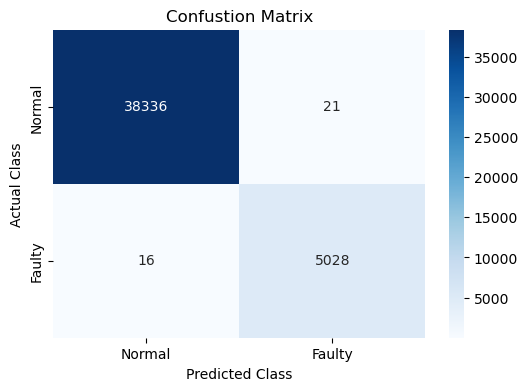

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

class_names = ["Normal","Faulty"]

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues",xticklabels=class_names, yticklabels=class_names)
plt.title("Confustion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()

## Deal with Weight Initialization

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.initializers import HeNormal, GlorotUniform

model = Sequential([
    LSTM(128,activation='tanh',kernel_initializer=GlorotUniform(),input_shape=(3,4),return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='tanh',kernel_initializer=GlorotUniform()),
    Dropout(0.3),
    Dense(32,activation='relu',kernel_initializer=HeNormal()),
    Dense(1,activation='sigmoid',kernel_initializer=GlorotUniform())
        
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train_rnn,y_train, epochs=3, class_weight=class_weights_dict)

Epoch 1/3
5425/5425 [==============================] - 37s 6ms/step - loss: 0.0390 - accuracy: 0.9873
Epoch 2/3
5425/5425 [==============================] - 34s 6ms/step - loss: 0.0154 - accuracy: 0.9975
Epoch 3/3
5425/5425 [==============================] - 35s 6ms/step - loss: 0.0133 - accuracy: 0.9973


In [93]:
loss, acc = model.evaluate(X_test_rnn,y_test)

1357/1357 [==============================] - 5s 3ms/step - loss: 0.0057 - accuracy: 0.9988


## Feature Importance by Permutation Importance

In [94]:
def compute_permutation_importance(model,X, y, metric=accuracy_score):
    baseline_accuracy = metric(y,(model.predict(X) > 0.5).astype(int))
    feature_importance = []
    
    for i in range(X.shape[1]):
        for j in range(X.shape[2]):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, i, j])
        
            accuracy = metric(y,(model.predict(X_permuted) > 0.5).astype(int))
            importance = baseline_accuracy - accuracy
            feature_importance.append(importance)

    return np.array(feature_importance)

importance = compute_permutation_importance(model,X_test_rnn,y_test)


1357/1357 [==============================] - 4s 3ms/step


In [95]:
print("Feature Importance:", importance)

Feature Importance: [ 4.75104260e-02  6.04801733e-01  2.22368148e-01  5.67221953e-01
  2.85707703e-03  4.47823783e-01  1.31126011e-01  2.50086404e-01
 -2.30409438e-05  1.35089053e-01  5.48604871e-02  2.03681943e-02]


In [96]:
X_test_rnn.shape[2]

4

## visualize feature importance

1357/1357 [==============================] - 4s 3ms/step


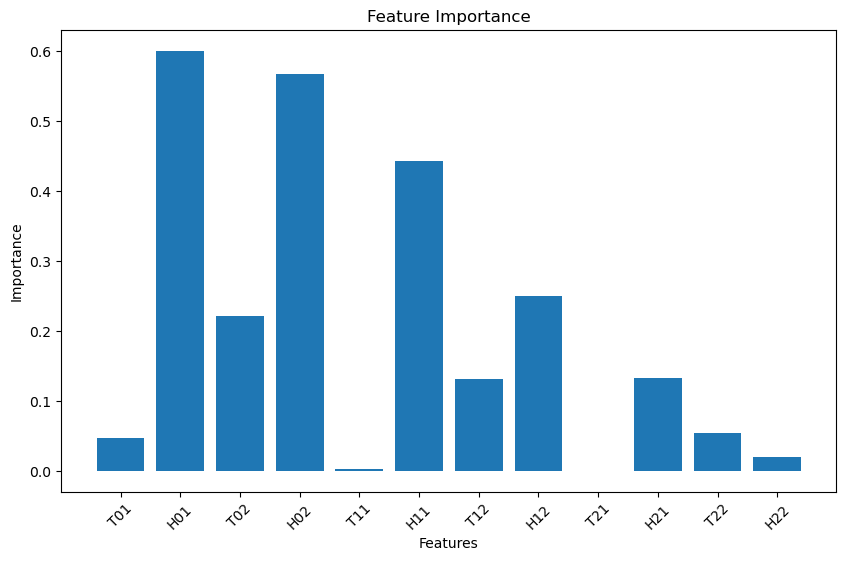

In [97]:
features = ['T01', 'H01', 'T02', 'H02', 'T11', 'H11', 'T12', 'H12', 'T21', 'H21', 'T22', 'H22']

importance = compute_permutation_importance(model, X_test_rnn, y_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()


## Visualize weights and biases after training

In [99]:
for i, layer in enumerate(model.layers):
    print(f"Layer {i} - {layer.name}")
    
    if len(layer.get_weights()) > 0:
        weights = layer.get_weights()
        if "lstm" in layer.name:
            kernel, recurrent_kernel, biases = weights
            print(f"Kernel shape (input-to-hidden):{kernel.shape}")
            print(f"Recurrent kernel shape (hidden-to-hidden):{recurrent_kernel.shape}")
            print(f"Biases shape: {biases.shape}")
        
        else:
            weights, biases = weights
            print(f"Weights shape:{weights.shape}")
            print(f"Biases shape: {biases.shape}")
            
    else:
        print("This layer has no trainable weights.")

Layer 0 - lstm_10
Kernel shape (input-to-hidden):(4, 512)
Recurrent kernel shape (hidden-to-hidden):(128, 512)
Biases shape: (512,)
Layer 1 - dropout_14
This layer has no trainable weights.
Layer 2 - lstm_11
Kernel shape (input-to-hidden):(128, 256)
Recurrent kernel shape (hidden-to-hidden):(64, 256)
Biases shape: (256,)
Layer 3 - dropout_15
This layer has no trainable weights.
Layer 4 - dense_18
Weights shape:(64, 32)
Biases shape: (32,)
Layer 5 - dense_19
Weights shape:(32, 1)
Biases shape: (1,)


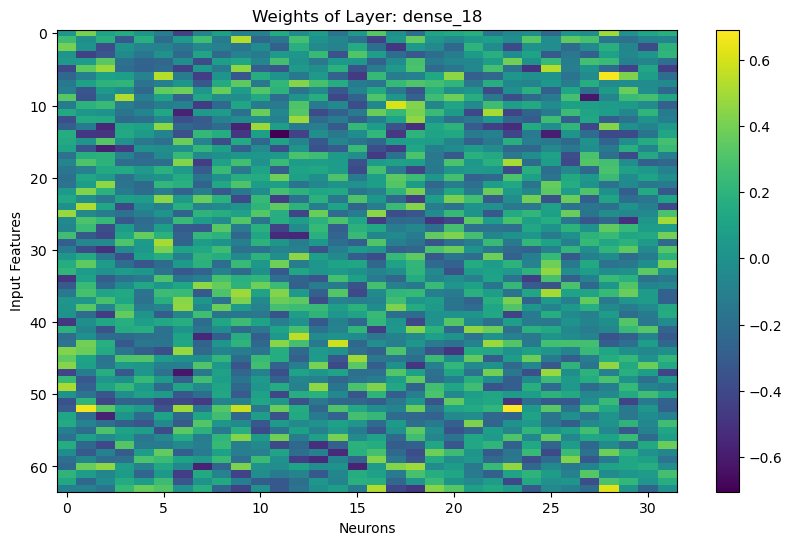

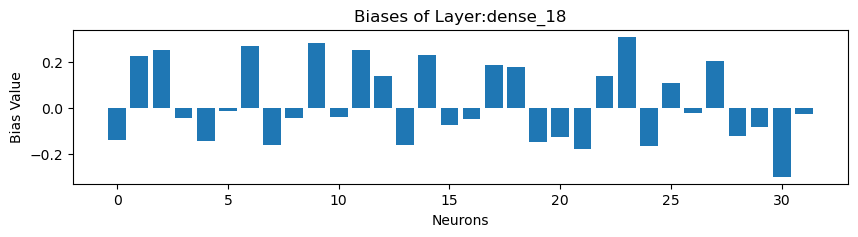

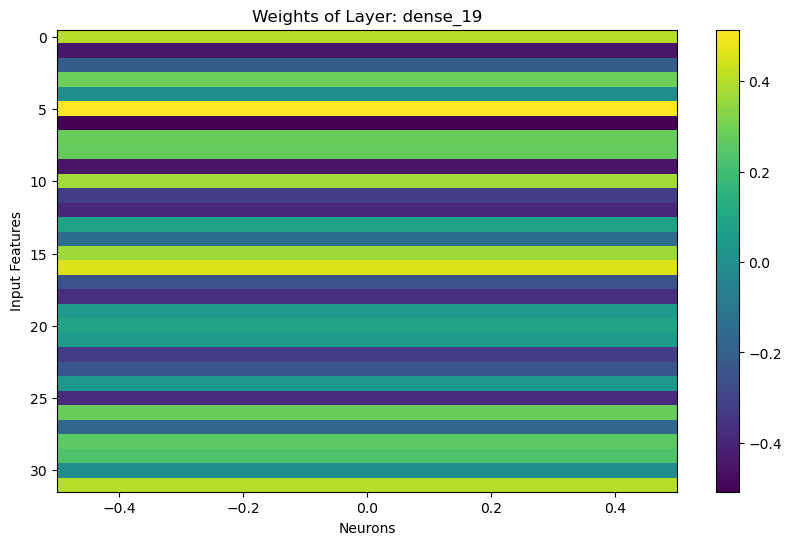

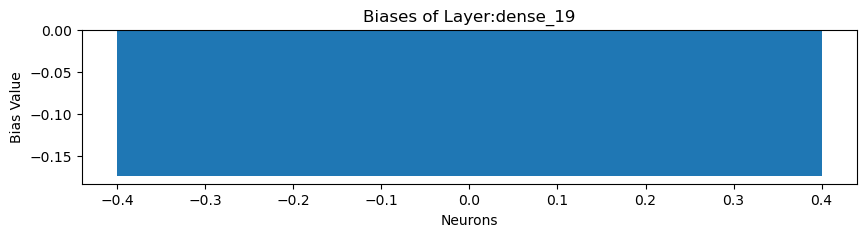

In [100]:
layer_name = "dense"

for layer in model.layers:
    if layer.name.startswith(layer_name):
        weights, biases = layer.get_weights()
        
        plt.figure(figsize=(10,6))
        plt.title(f"Weights of Layer: {layer.name}")
        plt.imshow(weights, aspect='auto',cmap="viridis")
        plt.colorbar()
        plt.xlabel("Neurons")
        plt.ylabel("Input Features")
        plt.show()
        
        
        plt.figure(figsize=(10,2))
        plt.title(f"Biases of Layer:{layer.name}")
        plt.bar(np.arange(len(biases)),biases)
        plt.xlabel("Neurons")
        plt.ylabel("Bias Value")
        plt.show()

Weights shapes:
Kernel (input-to-hidden): (4, 512)
Recurrent kernel (hidden-to-hidden): (128, 512)
Biases: (512,)


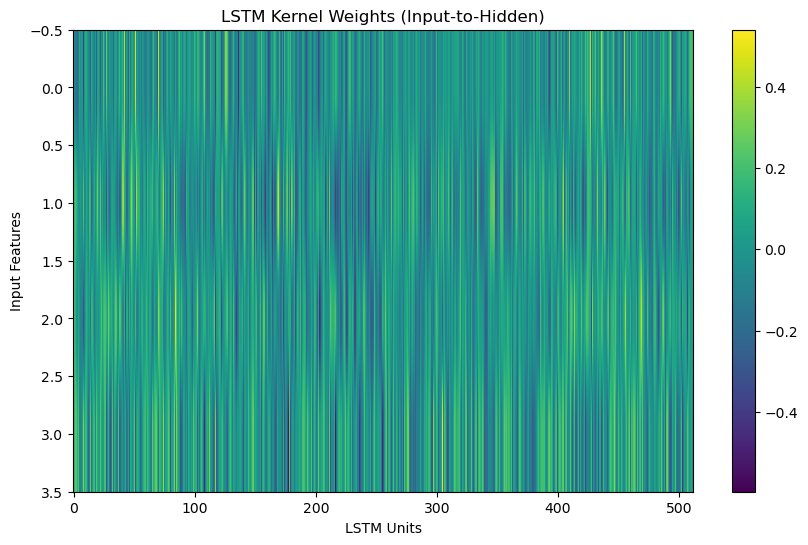

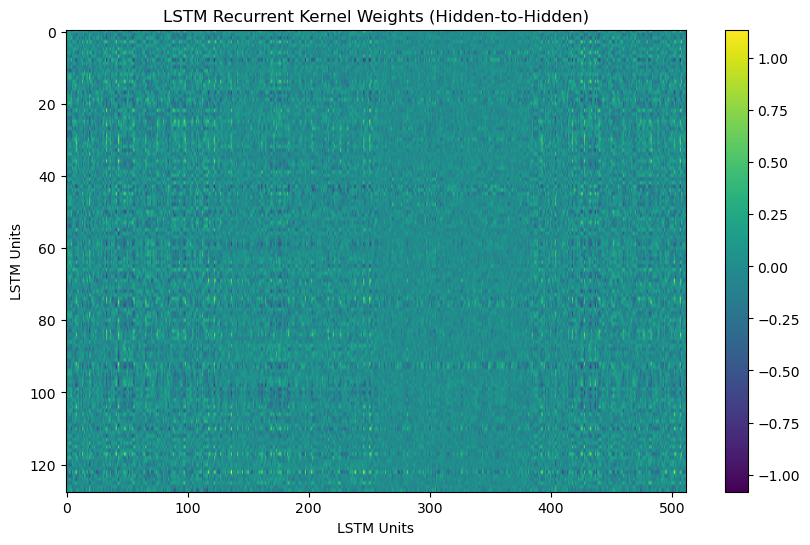

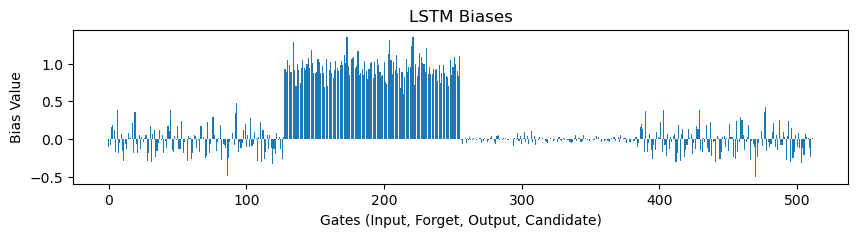

In [101]:
lstm_layer = model.layers[0]
kernel, recurrent_kernel, biases = lstm_layer.get_weights()

print("Weights shapes:")
print(f"Kernel (input-to-hidden): {kernel.shape}")
print(f"Recurrent kernel (hidden-to-hidden): {recurrent_kernel.shape}")
print(f"Biases: {biases.shape}")

plt.figure(figsize=(10, 6))
plt.title("LSTM Kernel Weights (Input-to-Hidden)")
plt.imshow(kernel, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel("LSTM Units")
plt.ylabel("Input Features")
plt.show()

plt.figure(figsize=(10, 6))
plt.title("LSTM Recurrent Kernel Weights (Hidden-to-Hidden)")
plt.imshow(recurrent_kernel, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel("LSTM Units")
plt.ylabel("LSTM Units")
plt.show()

# Visualize the biases
plt.figure(figsize=(10, 2))
plt.title("LSTM Biases")
plt.bar(np.arange(len(biases)), biases)
plt.xlabel("Gates (Input, Forget, Output, Candidate)")
plt.ylabel("Bias Value")
plt.show()
